## Import the Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the Data

In [8]:
visa_df = pd.read_csv(r"C:\Users\D.JYOTSNA\OneDrive\Documents\Full Stack Data Science\2. DataFiles\Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [10]:
cat = visa_df.select_dtypes(include = 'object').columns
num = visa_df.select_dtypes(exclude = 'object').columns

- Scaling is the one of the most important step before model development

- Scaling means make all the columns under one scale

- Scaling used to make all the columns or features comparable

- Some ML models works on Distance Methods

    - Example : age_min = 0, age_max = 100

    - Income might be lakhs, crores so much bigger values

    - If we dont make age and income under one scale ML models treats income is the Important Variable

    - When values are huge, maths makes more complex so it is better to do lower down the values

    - All the features under onescale, so easy to compare

        - For Example : Dollars and Rupees (We cannot compare because 2 are different scales)


# Standard Scalar

- Also called z-scale

- Makes always mean = 0

- Makes always Standard Deviation = 1

<img src="https://journaldev.nyc3.cdn.digitaloceanspaces.com/2020/10/Standardization.png" jsaction="" class="sFlh5c FyHeAf iPVvYb" style="max-width: 361px; height: 171px; margin: 132px 0px; width: 393px;" alt="Using StandardScaler() Function to Standardize Python Data | DigitalOcean" jsname="kn3ccd">

## Steps in python 

- Step1 : x = Prevailing wage

- Step2 : mean = mean of prevailing wage

- Step3 : std = std of prevailing wage

- step4 : step1 - step2

- step5 : step4 / step3

In [20]:
x = visa_df['prevailing_wage']
mean = round(np.mean(x),2)
std = round(np.std(x),2)
num = x - mean
z_scale = num / std
z_scale

0       -1.398537
1        0.169835
2        0.919079
3        0.169994
4        1.428604
           ...   
25475    0.049925
25476    3.876159
25477    1.360280
25478    0.221509
25479   -0.067763
Name: prevailing_wage, Length: 25480, dtype: float64

In [24]:
z_scale.mean(),z_scale.std()

(8.694688373123115e-08, 1.0000195461257795)

In [32]:
int(8.694688373123115e-08),int(1.0000195461257795)

(0, 1)

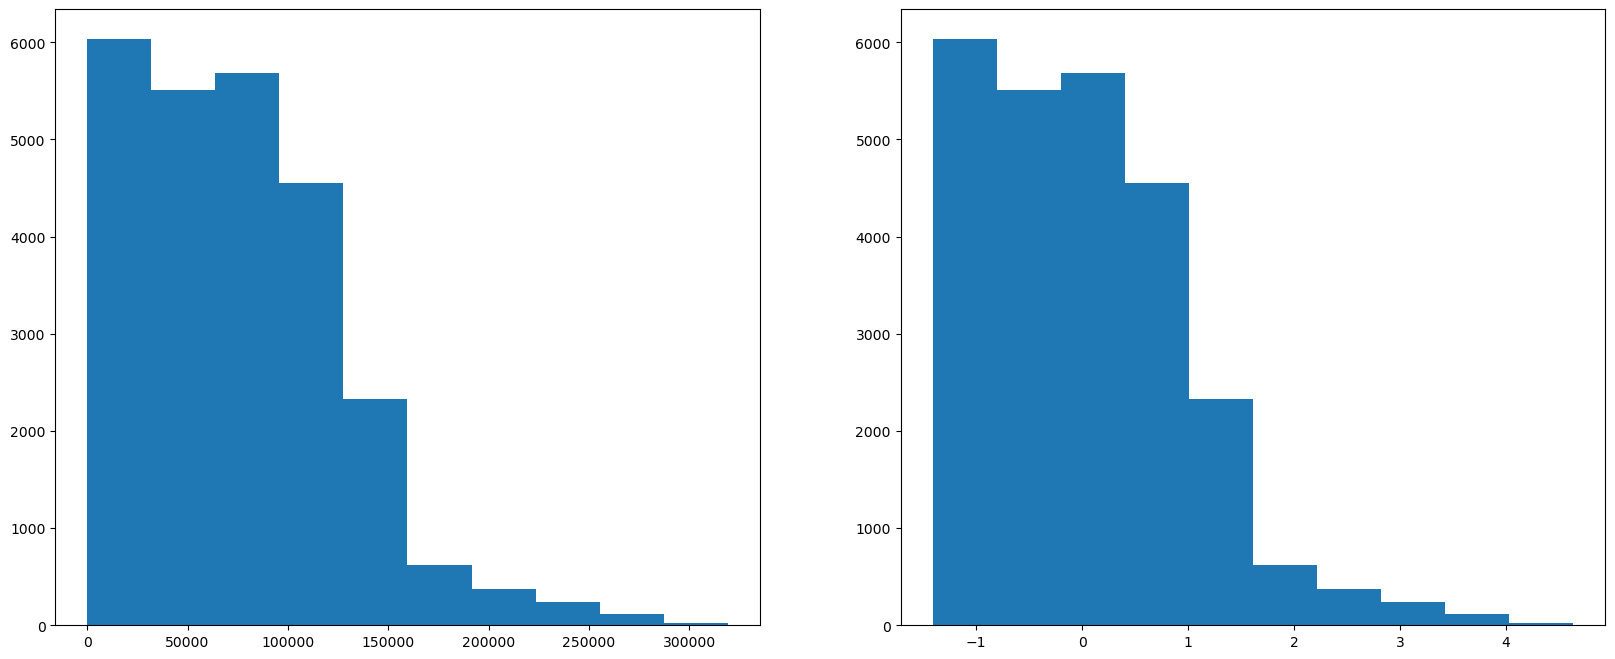

In [34]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).hist(z_scale)
plt.show()

## Using Package

In [44]:
from sklearn.preprocessing import StandardScaler
wage_data = visa_df[['prevailing_wage']]
ss = StandardScaler()
wage_ss = ss.fit_transform(wage_data)
wage_ss

array([[-1.39853722],
       [ 0.1698353 ],
       [ 0.91907852],
       ...,
       [ 1.36027953],
       [ 0.22150859],
       [-0.06776315]])

(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([-1.40970956, -0.80531933, -0.20092909,  0.40346114,  1.00785137,
         1.61224161,  2.21663184,  2.82102207,  3.42541231,  4.02980254,
         4.63419278]),
 <BarContainer object of 10 artists>)

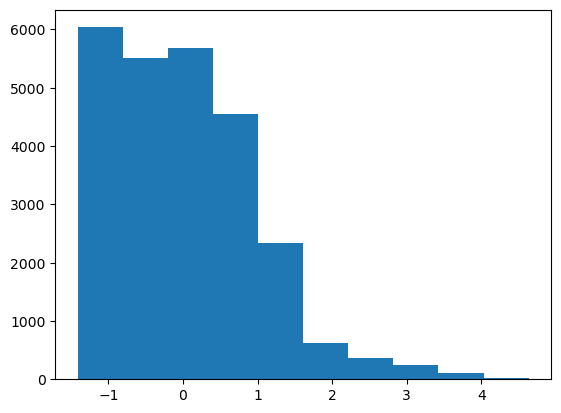

In [46]:
plt.hist(wage_ss)

# MinMaxScaler

<img src="https://miro.medium.com/v2/0*jLXgL0vdAo43ua0P.jpg" jsaction="" class="sFlh5c FyHeAf iPVvYb" style="max-width: 521px; height: 130px; margin: 152.5px 0px; width: 432px;" alt="Feature Scaling with Scikit-Learn for Data Science | by Hasan Ersan YAĞCI |  Medium" jsname="kn3ccd">

In [51]:
from sklearn.preprocessing import MinMaxScaler
wage_data = visa_df[['prevailing_wage']]
scaler = MinMaxScaler()
mm_wage = scaler.fit_transform(wage_data)
mm_wage

array([[0.00184853],
       [0.2613452 ],
       [0.385312  ],
       ...,
       [0.45831136],
       [0.26989486],
       [0.22203311]])

(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

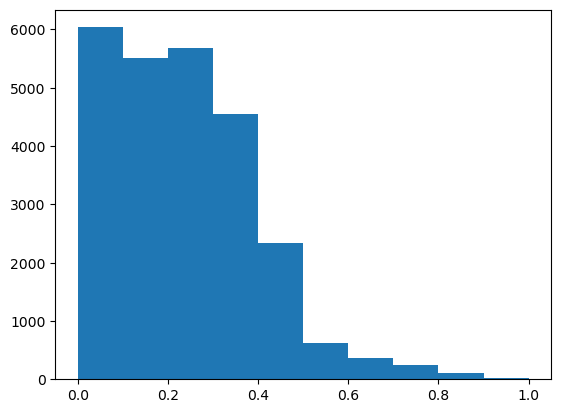

In [53]:
plt.hist(mm_wage)

(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

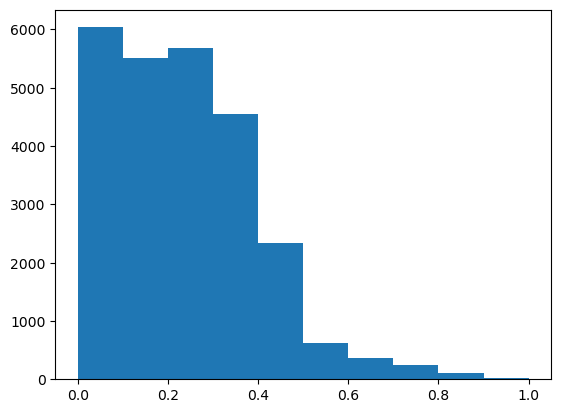

In [69]:
x = visa_df['prevailing_wage']
x_min = x.min()
x_max = x.max()
num = x - x_min
den = x_max - x_min
mm = num/den
plt.hist(mm)

In [71]:
mm.min(),mm.max()

(0.0, 1.0)